In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [ ]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
print(classes)

[b'non-cat' b'cat']


In [ ]:
print(train_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_x_orig.shape)
print(test_set_y.shape)

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)


**To see image**

Non-cat Image


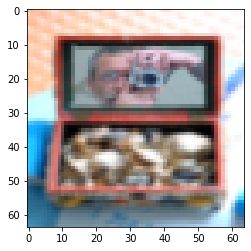

In [ ]:
index=15
plt.imshow(train_set_x_orig[index])
# print(train_set_y)
label=train_set_y[0][index]
# label=train_set_y[0,index]
if(label):
  print("Cat Image")
else:
  print("Non-cat Image")


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px  ∗∗  num_px  ∗∗  3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

Exercise: Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px  ∗∗  num_px  ∗∗  3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b ∗∗ c ∗∗ d, a) is to use:

X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X

In [ ]:
train_set_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_flatten=test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print(train_set_flatten.shape)
print(test_set_flatten.shape)

print ("train_set_x_flatten shape: " + str(train_set_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

(12288, 209)
(12288, 50)
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

Let's standardize our dataset.

In [ ]:
train_set_x = train_set_flatten/255.
test_set_x = test_set_flatten/255.

 compute  sigmoid(wTx+b)=11+e−(wTx+b)sigmoid(wTx+b)=11+e−(wTx+b) 

In [ ]:
def sigmoid(z):
  return (1/(1+np.exp(-z)))

# sigmoid function=1/(1+e^-z)
# z is an array
# sigmoid funtion convert every element of array to 1/(1+e^-(element))

In [ ]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

4.3 - Forward and Backward propagation
Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

Exercise: Implement a function propagate() that computes the cost function and its gradient.

Hints:

Forward Propagation:

You get X
You compute  A=σ(wTX+b)=(a(1),a(2),...,a(m−1),a(m))A=σ(wTX+b)=(a(1),a(2),...,a(m−1),a(m)) 
You calculate the cost function:  J=−1m∑mi=1y(i)log(a(i))+(1−y(i))log(1−a(i))J=−1m∑i=1my(i)log⁡(a(i))+(1−y(i))log⁡(1−a(i)) 
Here are the two formulas you will be using:

∂J∂w=1mX(A−Y)T(7)
(7)∂J∂w=1mX(A−Y)T
 
∂J∂b=1m∑i=1m(a(i)−y(i))(8)

In [ ]:
def propagate(w,b,X,Y):
  m=X.shape[1]
  # m No of columns in X or number of examples
  #w dimesnion is (nx,1)
  #Y dimesnion is (1,m)
  #A dimesnion is (2,1)^T*(2,2)=(1,2)

  #Forward propagagtion
  A = sigmoid((np.dot(w.T, X) + b)) 
  # print(f"dimension of A is : {A.shape}")
  # temp=-1./m*(Y*np.log(A) + (1-Y)*np.log(1-A))
  # print(temp)
  cost = -(1/m)* np.sum((Y*np.log(A)) + (1-Y)*np.log(1-A))
  #cost dimension will be of dimension of Y but but we did np.sum(sum of all elements of matrix) to convert into a integer.

  #Backpropagation
  # dZ=(A-Y)
  dw=1/m*np.dot(X,(A-Y).T)
  print(f"X shape is : {X.shape}")
  print(f"A shape is : {A.shape}") 
  print(f"Y shape is : {Y.shape}")  
  #X dimension is (Nx,m) and dimension of dZ is (1,m),to multiply we transposed dz
  #dimension of X and dZ would be same,so we transposed dZ
  db=1/m*np.sum(A-Y)
  print(f"dw shape is : {dw.shape}")
  print(f"w shape is : {w.shape}")
  print(f"A-Y shape is : {(A-Y).shape}") 
  assert(dw.shape == w.shape)
  
  cost = np.squeeze(cost)

  grades={"dw":dw,
          "db":db}
  return grades,cost

In [ ]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))
print(w)
print(b)
print(X)

d) Optimization
You have initialized your parameters.
You are also able to compute a cost function and its gradient.
Now, you want to update the parameters using gradient descent.
Exercise: Write down the optimization function. The goal is to learn  w  and  b  by minimizing the cost function  J . For a parameter  θ , the update rule is  θ=θ−α dθ , where  α  is the learning rate.

In [ ]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost= False ):
  costs=[]
  # print(f"dimension of w is : {w.shape}")
  # print(f"dimenison of x is : {X.shape}")
  for i in range(num_iterations):
    grads,cost=propagate(w,b,X,Y)
    dw=grads["dw"]
    db=grads["db"]
    w=w-learning_rate*dw
    b=b-learning_rate*db
    
    if(i%100) == 0:
      costs.append(cost)

  params={"w":w,
            "b":b}
  grads={"dw":dw,
           "db":db}
  return params,grads,costs


In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Function to predict the Y_train and Y_test

In [ ]:
def predict(w,b,X):
  m=X.shape[1]
  Y_prediction=np.zeros((1,m))
  print(Y_prediction)
  w = w.reshape(X.shape[0], 1)
  A=sigmoid(np.dot(w.T,X)+b)
  print(A)
  #dimesnion of A must be equal to dimeanion of Y or Y_prediction i.e. (1,m)
  for i in range(A.shape[1]):
    if(A[0,i]>0.5):
      Y_prediction[0,i]=1
    else:
      Y_prediction[0,i]=0
  assert(Y_prediction.shape == (1, m))
    
  return Y_prediction



In [ ]:
# w=np.zeros((train_set_x.shape[0],1))
# b=0
# print(f"dimension of  w: {w.shape}")
# y=predict(w,b,train_set_x)

w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

In [ ]:
def model(X_train,Y_train,X_test,Y_test,num_iterations=2000,learning_rate=0.5,print_cost=False):
  #initialise w and b matrix with zeros
  w=np.zeros((X_train.shape[0],1))
  b=0
  #X_train=X whose dimension is (nx,m)
  parameters,grads,costs=optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
  
  w=parameters["w"]
  b=parameters["b"]

  Y_prediction_test=predict(w,b,X_test)
  Y_prediction_train=predict(w,b,X_train)
  
  # print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
  # print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
  
  d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
  return d



In [ ]:
d = model(train_set_x,train_set_y, test_set_x, test_set_y,num_iterations = 2000,learning_rate = 0.5, print_cost = True)

In [ ]:
# Example of a picture that was wrongly classified.
index = 49
plt.imshow(test_set_x[:,index].reshape((64, 64, 3)))
temp=d["Y_prediction_test"][0,index]
if(temp):
  print("cat Image")
else:
  print("Non-Cat Image")